<a href="https://colab.research.google.com/github/Pashademid/project_forbes/blob/main/_project_forbes_2022_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("2022_forbes_billionaires.csv",usecols=["rank","name","networth","age","country","source","industry"])
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [147]:
df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [148]:
df.isna().any()

,0
rank,False
name,False
networth,False
age,False
country,False
source,False
industry,False


In [149]:
df["networth"] = df["networth"].astype("string").str.replace(r"[$B]","",regex=True).astype("float")

In [150]:
df.sort_values("networth",ascending=False)

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


# Описательная статистика

In [129]:
# Количество миллиардеров в списке
tottal_billionaires = len(df)
print('Кол-во миллиардеров =',tottal_billionaires)

Кол-во миллиардеров = 2600


In [130]:
#Средний, медианный возраст миллиардера
mean_age = df["age"].mean()
median_age =df["age"].median()
print('Средний возраст =',mean_age)
print('Медиана =',median_age)

Средний возраст = 64.27192307692307
Медиана = 64.0


In [131]:
#Среднее, минимальное и максимальное состояние
mean_networth = df["networth"].mean()
max_networth = df["networth"].max()
min_networth = df["networth"].min()

print('Среднее =',mean_networth)
print('Максимальное =',max_networth)
print('Минимальное =',min_networth)

Среднее = 4.8607499999999995
Максимальное = 219.0
Минимальное = 1.0


In [132]:
#Топ-10 по состоянию
df.head(10)

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.0,49,United States,Google,Technology
6,7,Sergey Brin,107.0,48,United States,Google,Technology
7,8,Larry Ellison,106.0,77,United States,software,Technology
8,9,Steve Ballmer,91.4,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,90.7,64,India,diversified,Diversified


# География миллиардов

In [133]:
# Топ 5 стран по количесвтву миллиардеров
df.groupby("country")["name"].count().sort_values(ascending=False).head(5)

,name
country,
United States,719
China,515
India,161
Germany,130
Russia,81


In [134]:
# Топ стран по суммарному состоянию
df.groupby("country")["networth"].sum().sort_values(ascending=False).head(5)

,networth
country,
United States,4685.10
China,1938.45
India,744.80
Germany,604.00
France,550.00


Text(0.5, 1.0, 'Топ 5 стран')

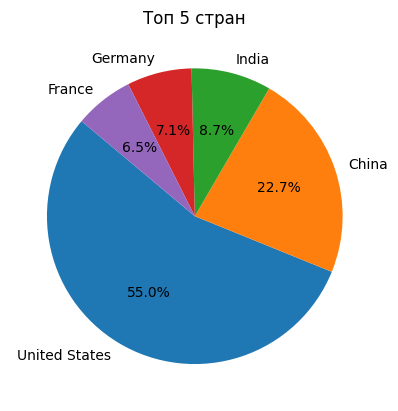

In [135]:
# ВИзуализация итогов pie chart
top_country = df.groupby("country")["networth"].sum().sort_values(ascending=False).head(5)

plt.pie(top_country, labels=top_country.index, autopct='%1.1f%%', startangle=140)
plt.title("Топ 5 стран")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Elon Musk '),
  Text(1, 0, 'Jeff Bezos '),
  Text(2, 0, 'Bernard Arnault & family '),
  Text(3, 0, 'Bill Gates '),
  Text(4, 0, 'Warren Buffett ')])

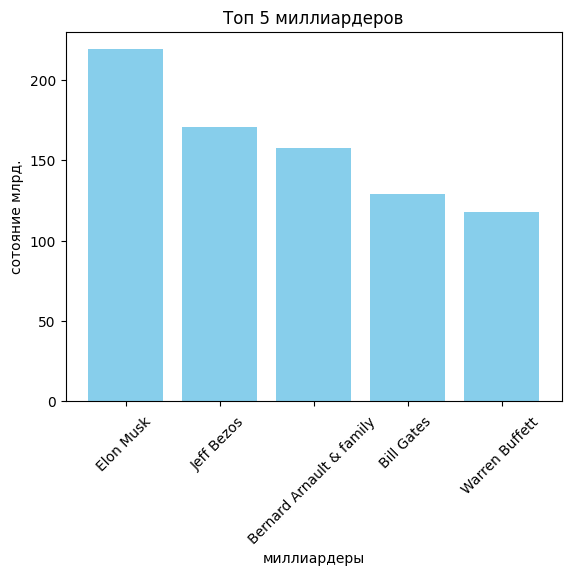

In [136]:
# Визуализация итогов bar chart
top5 = df[["networth","name"]].head(5)
plt.bar(top5["name"],top5['networth'],color='skyblue')
plt.title("Топ 5 миллиардеров")
plt.xlabel("миллиардеры")
plt.ylabel("сотояние млрд.")
plt.xticks(rotation=45)

# Связь возраста и состояния

Text(0.5, 1.0, 'Зависимость возраста и состояния')

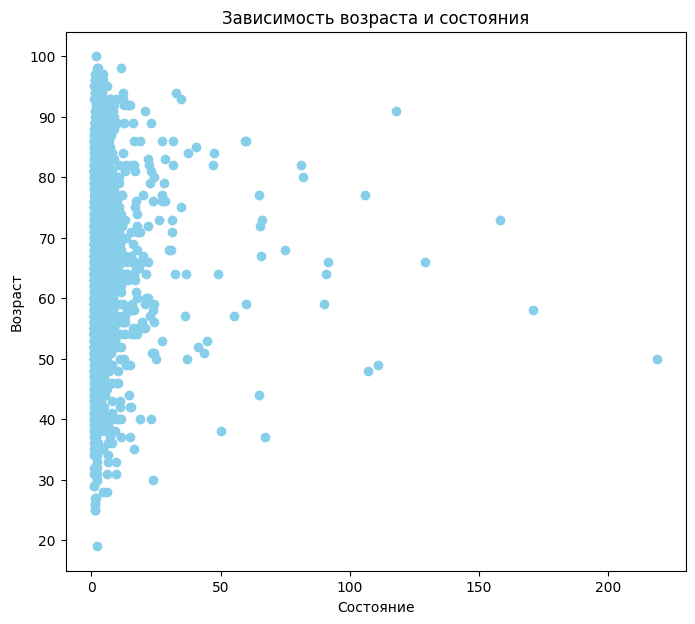

In [137]:
plt.figure(figsize=(8,7))
plt.scatter(x=df["networth"],y=df["age"], color="skyblue")
plt.xlabel("Состояние")
plt.ylabel("Возраст")
plt.title("Зависимость возраста и состояния")

In [138]:
df_corr = df[["networth","age"]].corr()
df_corr

,networth,age
networth,1.000000,0.039966
age,0.039966,1.000000


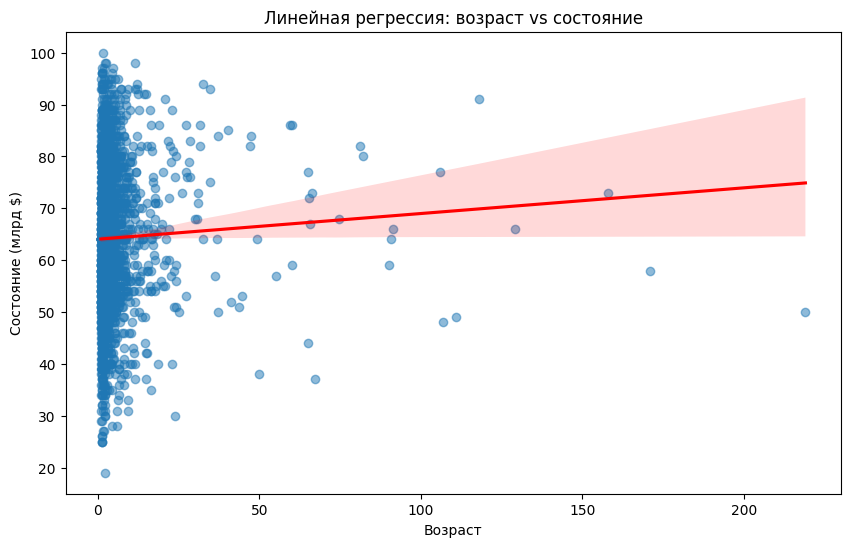

In [139]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="networth", y="age", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Линейная регрессия: возраст vs состояние")
plt.xlabel("Возраст")
plt.ylabel("Состояние (млрд $)")
plt.show()


# Источник состояния

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'real estate'),
  Text(1, 0, 'diversified'),
  Text(2, 0, 'investments'),
  Text(3, 0, 'software'),
  Text(4, 0, 'pharmaceuticals'),
  Text(5, 0, 'hedge funds'),
  Text(6, 0, 'Google'),
  Text(7, 0, 'Walmart'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Tesla, SpaceX')])

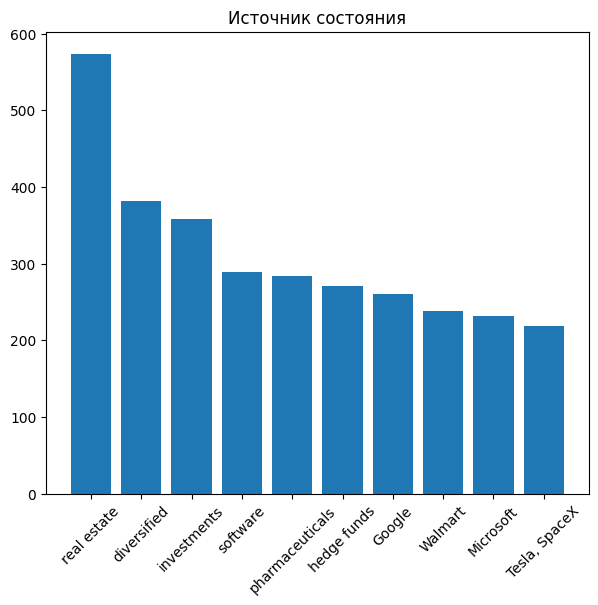

In [140]:
source_sum = df.groupby("source")["networth"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,6))
plt.bar(source_sum.index,source_sum.values)
plt.title("Источник состояния")
plt.xticks(rotation=45)

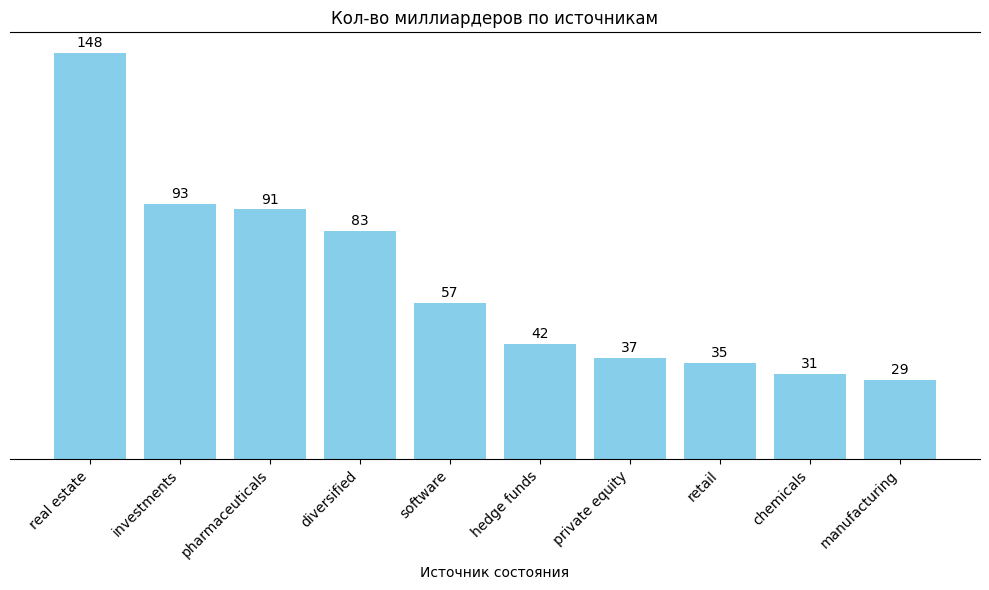

In [141]:

# Распределение
bill_in_source = df.groupby("source")["name"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.bar(bill_in_source.index, bill_in_source.values, color="skyblue")
plt.title("Кол-во миллиардеров по источникам")
plt.xlabel("Источник состояния")
plt.xticks(rotation=45, ha='right')

# Добавление значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Убираем левую ось и цифры на ней
ax = plt.gca()
ax.spines['left'].set_visible(False)       # убрать линию оси Y
ax.yaxis.set_visible(False)                # убрать метки и деления по Y
ax.spines['right'].set_visible(False)      # также убрать правую рамку

plt.tight_layout()
plt.show()




In [153]:
industry_treemap = df.groupby("industry")["networth"].sum().sort_values(ascending=False).head(10)



/tmp/ipython-input-161-491701759.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources.values, y=top_sources.index, palette=sns.color_palette("rocket", n_colors=10))


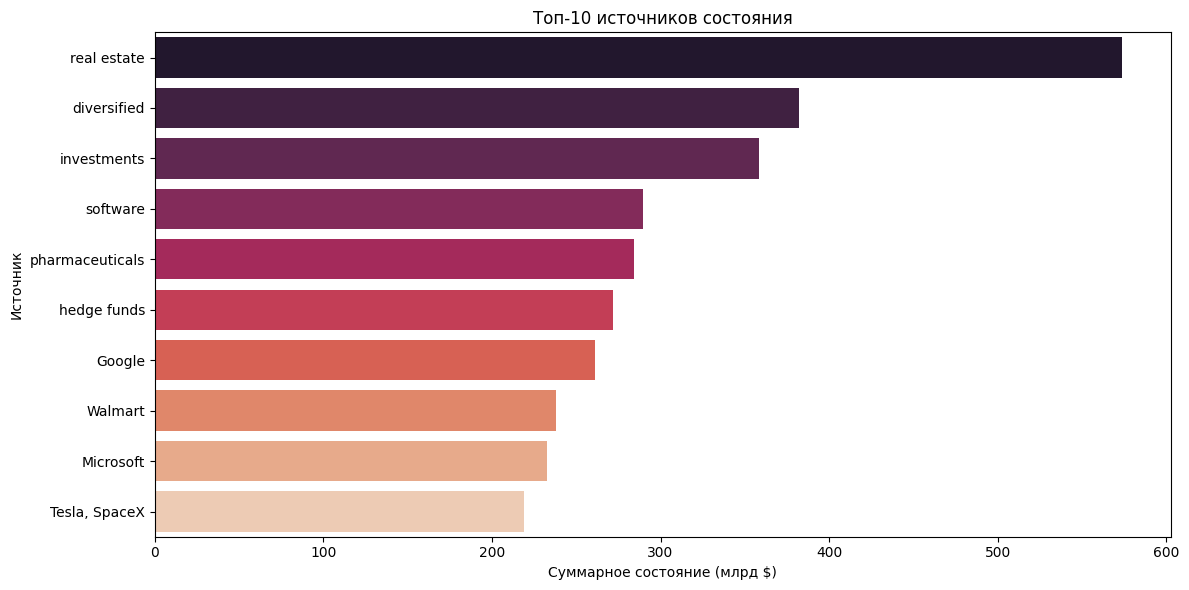

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

top_sources = df.groupby("source")["networth"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sources.values, y=top_sources.index, palette=sns.color_palette("rocket", n_colors=10))
plt.title("Топ-10 источников состояния")
plt.xlabel("Суммарное состояние (млрд $)")
plt.ylabel("Источник")
plt.tight_layout()
plt.show()


In [163]:
df.to_csv("new_set_billioners", index=False, encoding="utf-8")